In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a DataFrame with player data
data = {
    'Player': ['Player A', 'Player B', 'Player C', 'Player D', 'Player E'],
    'OBP': [0.380, 0.360, 0.310, 0.420, 0.340],
}

df = pd.DataFrame(data)

df


Player   OBP
0  Player A  0.38
1  Player B  0.36
2  Player C  0.31
3  Player D  0.42
4  Player E  0.34

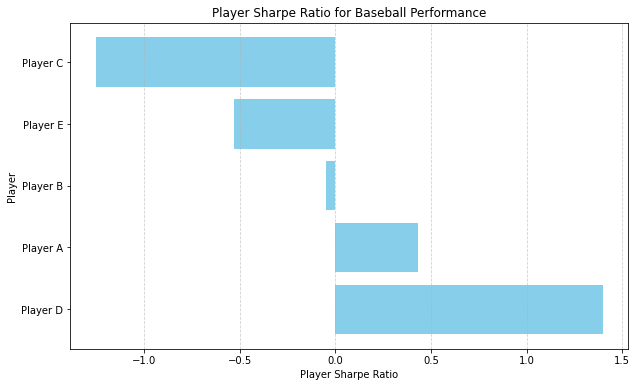

In [3]:
# Define a risk-free rate (for example, the league average OBP)
risk_free_rate = df['OBP'].mean()

# Calculate the excess return for each player
df['Excess Return'] = df['OBP'] - risk_free_rate

# Assuming a measure of risk or variability, you could add that to your DataFrame as well
# For simplicity, let's create a hypothetical risk measure as standard deviation of OBP
risk_measure = df['OBP'].std()
df['Risk'] = risk_measure

# Calculate the Player Sharpe Ratio
df['Player Sharpe Ratio'] = df['Excess Return'] / df['Risk']

# Sort the DataFrame by Player Sharpe Ratio (descending) to show the highest values at the top
df_sorted = df.sort_values(by='Player Sharpe Ratio', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['Player'], df_sorted['Player Sharpe Ratio'], color='skyblue')
plt.xlabel('Player Sharpe Ratio')
plt.ylabel('Player')
plt.title('Player Sharpe Ratio for Baseball Performance')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.show()


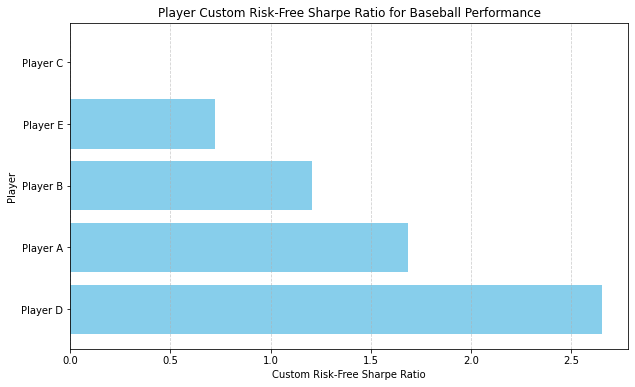

In [5]:
# Define a different risk-free rate
risk_free_rate_custom = df['OBP'].min()

# Calculate the Player Sharpe Ratio with the custom risk-free rate
df['Custom Risk-Free Sharpe Ratio'] = (df['OBP'] - risk_free_rate_custom) / df['Risk']

df_sorted = df.sort_values(by='Custom Risk-Free Sharpe Ratio', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['Player'], df_sorted['Custom Risk-Free Sharpe Ratio'], color='skyblue')
plt.xlabel('Custom Risk-Free Sharpe Ratio')
plt.ylabel('Player')
plt.title('Player Custom Risk-Free Sharpe Ratio for Baseball Performance')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.show()

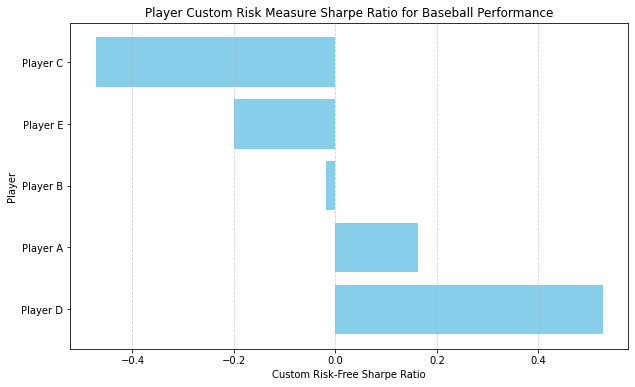

In [6]:
custom_risk_measure = df['OBP'].max() - df['OBP'].min()
df['Custom Risk Measure Sharpe Ratio'] = (df['OBP'] - risk_free_rate) / custom_risk_measure
df_sorted = df.sort_values(by='Custom Risk Measure Sharpe Ratio', ascending=False)


# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['Player'], df_sorted['Custom Risk Measure Sharpe Ratio'], color='skyblue')
plt.xlabel('Custom Risk-Free Sharpe Ratio')
plt.ylabel('Player')
plt.title('Player Custom Risk Measure Sharpe Ratio for Baseball Performance')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.show()


In [3]:
pip install pymc3

Defaulting to user installation because normal site-packages is not writeable
  Using cached pymc3-3.11.5-py3-none-any.whl (872 kB)
  Using cached semver-3.0.2-py3-none-any.whl (17 kB)
  Using cached numpy-1.22.1-cp38-cp38-macosx_11_0_arm64.whl (12.7 MB)
  Using cached deprecat-2.1.1-py2.py3-none-any.whl (9.8 kB)
  Using cached cachetools-5.3.2-py3-none-any.whl (9.3 kB)
  Using cached typing_extensions-4.8.0-py3-none-any.whl (31 kB)
  Using cached Theano-PyMC-1.1.2.tar.gz (1.8 MB)
  Preparing metadata (setup.py) ... done
  Using cached dill-0.3.7-py3-none-any.whl (115 kB)
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
  Using cached fastprogress-1.0.3-py3-none-any.whl (12 kB)
  Using cached arviz-0.15.1-py3-none-any.whl (1.6 MB)
  Using cached scipy-1.7.3-1-cp38-cp38-macosx_12_0_arm64.whl (26.9 MB)
  Using cached filelock-3.12.4-py3-none-any.whl (11 kB)
  Using cached setuptools-68.2.2-py3-none-any.whl (807 kB)
  Using cached xarray-2023.1.0-py3-none-any.whl (973 kB)
  Using 

In [4]:
import pymc3

ModuleNotFoundError: No module named 'pymc3'

In [2]:
pip install pymc3


Defaulting to user installation because normal site-packages is not writeable
  Using cached pymc3-3.11.5-py3-none-any.whl (872 kB)
  Using cached numpy-1.22.1-cp38-cp38-macosx_11_0_arm64.whl (12.7 MB)
  Using cached arviz-0.15.1-py3-none-any.whl (1.6 MB)
  Using cached cachetools-5.3.2-py3-none-any.whl (9.3 kB)
  Using cached dill-0.3.7-py3-none-any.whl (115 kB)
  Using cached typing_extensions-4.8.0-py3-none-any.whl (31 kB)
  Using cached deprecat-2.1.1-py2.py3-none-any.whl (9.8 kB)
  Using cached fastprogress-1.0.3-py3-none-any.whl (12 kB)
  Using cached scipy-1.7.3-1-cp38-cp38-macosx_12_0_arm64.whl (26.9 MB)
  Using cached Theano-PyMC-1.1.2.tar.gz (1.8 MB)
  Preparing metadata (setup.py) ... done
  Using cached semver-3.0.2-py3-none-any.whl (17 kB)
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
  Using cached filelock-3.12.4-py3-none-any.whl (11 kB)
  Using cached xarray_einstats-0.5.1-py3-none-any.whl (28 kB)
  Using cached h5netcdf-1.1.0-py2.py3-none-any.whl (26 kB)
  U

In [3]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

# Simulated baseball data (number of at-bats and number of hits)
at_bats = 100
hits = 30

# Prior for batting average (uniform distribution between 0 and 1)
with pm.Model() as baseball_model:
    batting_average = pm.Uniform('batting_average', 0, 1)

    # Likelihood of observing the data
    hits_observed = pm.Binomial('hits_observed', n=at_bats, p=batting_average, observed=hits)

    # Sample from the posterior distribution
    trace = pm.sample(2000, tune=1000, cores=2)

# Plot the posterior distribution
pm.traceplot(trace)
plt.show()

# Summarize the posterior distribution
summary = pm.summary(trace)
print(summary)

# Calculate the credible interval (e.g., 95%)
credible_interval = np.percentile(trace['batting_average'], [2.5, 97.5])
print(f"Credible Interval (95%): {credible_interval[0]:.3f} to {credible_interval[1]:.3f}")


ModuleNotFoundError: No module named 'pymc3'

# Installation

In [5]:
import requests
import json
import pandas as pd

# creds

In [6]:
username = 'analytics@rockies.com'
password = 'Rooftop1993' 

# auth

In [7]:
def creds(username,password):
    okta = requests.post('https://statsapi.mlb.com/api/v1/authentication/okta/token', auth=(username,password))
    okta = json.loads(okta.text)
    auth_header = 'Bearer ' + okta['access_token']
    access_token = okta['access_token']
    headers = {"Authorization": f"Bearer {access_token}"}
    return headers

# get games

In [11]:
headers = creds(username,password)
#816275
#815226
url = f'https://statsapi.mlb.com/api/v1/people/816275'
response = requests.get(url, headers=headers)

resp = response.json()

resp

{'copyright': 'Copyright 2023 MLB Advanced Media, L.P.  Use of any content on this page acknowledges agreement to the terms posted here http://gdx.mlb.com/components/copyright.txt',
 'people': [{'id': 816275,
   'fullName': 'Kotaro Ueda',
   'link': '/api/v1/people/816275',
   'firstName': 'Kotaro',
   'lastName': 'Ueda',
   'birthDate': '2002-09-06',
   'currentAge': 21,
   'birthCountry': 'Japan',
   'height': '6\' 0"',
   'weight': 210,
   'active': True,
   'primaryPosition': {'code': '1',
    'name': 'Pitcher',
    'type': 'Pitcher',
    'abbreviation': 'P'},
   'useName': 'Kotaro',
   'useLastName': 'Ueda',
   'boxscoreName': 'Ueda',
   'gender': 'M',
   'isPlayer': True,
   'isVerified': True,
   'batSide': {'code': 'L', 'description': 'Left'},
   'pitchHand': {'code': 'L', 'description': 'Left'},
   'nameFirstLast': 'Kotaro Ueda',
   'nameSlug': 'kotaro-ueda-816275',
   'firstLastName': 'Kotaro Ueda',
   'lastFirstName': 'Ueda, Kotaro',
   'lastInitName': 'Ueda, K',
   'initLas

In [13]:
response.ok

True

In [8]:
headers = creds(username,password)

url = f'https://statsapi.mlb.com/api/v1/analytics/game'

response = requests.get(url, headers=headers)
resp = response.json()

resp

{'totalItems': 91058,
 'games': [{'gamePk': '277429',
   'link': 'https://statsapi.mlb.com/api/v1/game/277429/guids'},
  {'gamePk': '263816',
   'link': 'https://statsapi.mlb.com/api/v1/game/263816/guids'},
  {'gamePk': '263813',
   'link': 'https://statsapi.mlb.com/api/v1/game/263813/guids'},
  {'gamePk': '263817',
   'link': 'https://statsapi.mlb.com/api/v1/game/263817/guids'},
  {'gamePk': '263810',
   'link': 'https://statsapi.mlb.com/api/v1/game/263810/guids'},
  {'gamePk': '263820',
   'link': 'https://statsapi.mlb.com/api/v1/game/263820/guids'},
  {'gamePk': '263821',
   'link': 'https://statsapi.mlb.com/api/v1/game/263821/guids'},
  {'gamePk': '263814',
   'link': 'https://statsapi.mlb.com/api/v1/game/263814/guids'},
  {'gamePk': '263811',
   'link': 'https://statsapi.mlb.com/api/v1/game/263811/guids'},
  {'gamePk': '263809',
   'link': 'https://statsapi.mlb.com/api/v1/game/263809/guids'},
  {'gamePk': '263818',
   'link': 'https://statsapi.mlb.com/api/v1/game/263818/guids'},
 

In [9]:
response.ok

True

# get guids by game

In [5]:
headers = creds(username,password)

url = f'https://statsapi.mlb.com/api/v1/game/748561/guids'

response = requests.get(url, headers=headers)
resp = response.json()

guids = []


for i in range(0,len(resp)):
    guids.append(resp[i]['guid'])

# guid endpoint example [bat tracking](https://statsapi.mlb.com/docs/beta/endpointPage?random=618#get-/api/v1/batTracking/game/-gamePk-/-playId-)

In [6]:
headers = creds(username,password)

bat_trackings  =[]

for i in range(0,len(guids)):

    url = f'https://statsapi.mlb.com/api/v1/batTracking/game/748561/{guids[i]}'

    response = requests.get(url, headers=headers)
    resp = response.json()

    bat_trackings.append(resp)

    print(guids[i])
    print(resp)

25310143-3308-4f54-bf81-dbfcaff0ff2f
{'messageNumber': 10, 'message': 'Object not found', 'timestamp': '2023-10-16T16:37:46.334916481Z', 'traceId': None}
d2f411ca-b948-4d9e-8511-67d0c4d226d4
{'messageNumber': 10, 'message': 'Object not found', 'timestamp': '2023-10-16T16:37:46.779823283Z', 'traceId': None}
e9d68965-c465-448d-bdcd-1cd051e54002
{'messageNumber': 10, 'message': 'Object not found', 'timestamp': '2023-10-16T16:37:47.266303224Z', 'traceId': None}
718e42f2-8402-4e8a-ae4c-dd1a89066666
{'messageNumber': 10, 'message': 'Object not found', 'timestamp': '2023-10-16T16:37:47.760074607Z', 'traceId': None}
f623ee5b-b4a6-4c19-b7b0-fd20f0124830
{'messageNumber': 10, 'message': 'Object not found', 'timestamp': '2023-10-16T16:37:48.246041220Z', 'traceId': None}
28d4b384-ba85-4bf3-b718-01e53af1e41b
{'messageNumber': 10, 'message': 'Object not found', 'timestamp': '2023-10-16T16:37:48.950768699Z', 'traceId': None}
87d07301-1eb8-4832-9412-1fb7998f88c9
{'messageNumber': 10, 'message': 'Objec

In [9]:
cleaned_list = [d for d in bat_trackings if 'traceId' not in d or d['traceId'] is not None]

cleaned_list

[{'copyright': 'Copyright 2023 MLB Advanced Media, L.P.  Use of any content on this page acknowledges agreement to the terms posted here http://gdx.mlb.com/components/copyright.txt',
  'gamePk': 748561,
  'playId': '41d314ac-2370-4ea3-83f7-4d3eba733030',
  'impact': {'speed': {},
   'contactPoint': {},
   'headPosition': {},
   'handlePosition': {},
   'velocity': {'before': {}, 'after': {}}},
  'sweetSpot': {'velocity': {'before': {}}},
  'batPositions': [{'positionId': 'head', 'positions': []},
   {'positionId': 'handle', 'positions': []}]},
 {'copyright': 'Copyright 2023 MLB Advanced Media, L.P.  Use of any content on this page acknowledges agreement to the terms posted here http://gdx.mlb.com/components/copyright.txt',
  'gamePk': 748561,
  'playId': '72d4e762-1172-408f-8d29-fb7dcc8973cd',
  'impact': {'attackAngle': -1.6412900975480325,
   'speed': {'before': 69.67235238442647, 'after': 59.14686784753573},
   'contactPoint': {'x': -0.18145623645027617,
    'y': 1.3239467972326977,

In [10]:
len(cleaned_list)

272

In [11]:
len(guids)

987